In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mpl
import matplotlib

In [3]:
df=pd.read_csv('/Users/vinay/Downloads/foia_150k_plus.csv')

In [4]:
df1=pd.read_csv('/Users/vinay/Downloads/foia_less_than_150k.csv')

In [5]:
frames = [df,df1]

final = pd.concat(frames)

In [6]:
final.shape

(4885388, 18)

In [7]:
final.columns

Index(['LoanRange', 'BusinessName', 'Address', 'City', 'State', 'Zip',
       'NAICSCode', 'BusinessType', 'RaceEthnicity', 'Gender', 'Veteran',
       'NonProfit', 'JobsRetained', 'DateApproved', 'Lender', 'CD',
       'Unnamed: 0', 'LoanAmount'],
      dtype='object')

In [8]:
final.isna().sum()

LoanRange        4224170
BusinessName     4224178
Address          4224187
City                 247
State                  0
Zip                  224
NAICSCode         133527
BusinessType        4723
RaceEthnicity          0
Gender                 0
Veteran                0
NonProfit        4703708
JobsRetained      324122
DateApproved           0
Lender                 0
CD                     0
Unnamed: 0        661218
LoanAmount        661218
dtype: int64

In [9]:
final['NonProfit'] = final['NonProfit'].fillna('q')

In [10]:
final['NonProfit'] = final['NonProfit'].map({'Y':1, 'q':2})

In [11]:
final['BusinessName'] = ['-' for i in range(final.count().max())]
final['Address'] = ['-' for i in range(final.count().max())]

In [12]:
final.drop('Unnamed: 0', axis=1,inplace=True)

In [13]:
loan = {
    "a $5-10 million": {"lower": 5000000, "upper": 10000000},
    "b $2-5 million": {"lower": 2000000, "upper": 4999999},
    "c $1-2 million": {"lower": 1000000, "upper":1999999},
    "d $350,000-1 million": {"lower": 350000, "upper":999999},
    "e $150,000-350,000" : {"lower": 150000, "upper":349999}
}

In [14]:
final['LoanRange'].fillna(method ='ffill', inplace = True)

In [15]:
final['loan_lower'] = final['LoanRange'].apply(lambda x: loan[x]["lower"])
final['loan_upper'] = final['LoanRange'].apply(lambda x: loan[x]["upper"])

In [16]:
print(f'There are {final.JobsRetained.isna().sum():,.0f} out of {final.shape[0]:,.0f} companies that did not report the number of jobs retained')
print(f"There are {(final.JobsRetained==0).sum():,.0f} out of {final.shape[0]:,.0f} companies that reported 0 number of jobs retained")

There are 324,122 out of 4,885,388 companies that did not report the number of jobs retained
There are 554,146 out of 4,885,388 companies that reported 0 number of jobs retained


In [17]:
pd.DataFrame(final[final.BusinessType.notna()]["BusinessType"].value_counts())

,BusinessType
Corporation,1418759
Limited Liability Company(LLC),1410562
Subchapter S Corporation,721654
Sole Proprietorship,714743
Non-Profit Organization,179088
Self-Employed Individuals,174136
Independent Contractors,122630
Partnership,71037
Limited Liability Partnership,32973
Professional Association,22855


In [18]:
pd.DataFrame(final[final.State.notna()]["State"].value_counts())

,State
CA,581125
FL,393016
TX,389387
NY,323900
IL,202157
PA,165909
GA,156810
NJ,147548
OH,140278
NC,121913


In [19]:
final["date_approved_dt"] = pd.to_datetime(final["DateApproved"]).values

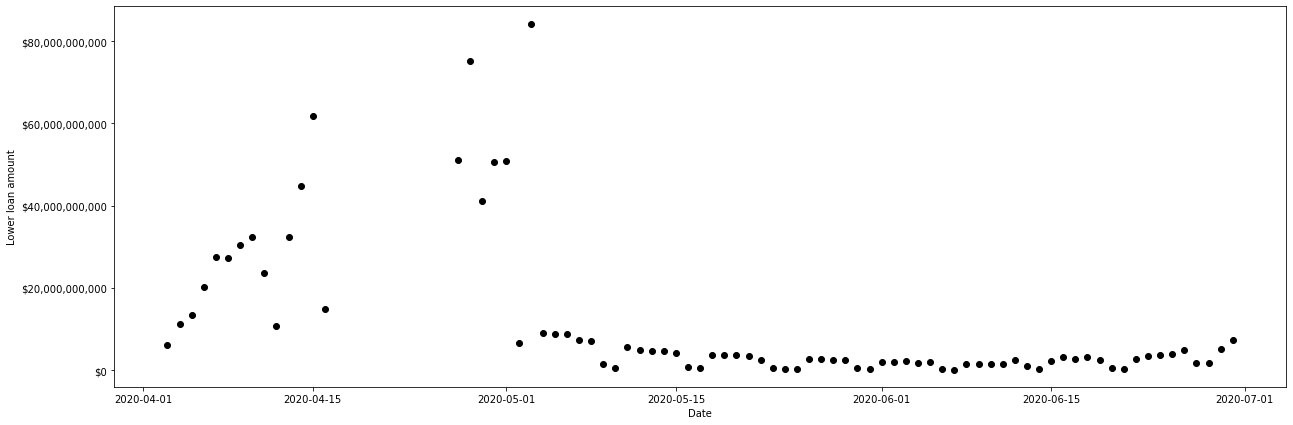

In [20]:
fig, ax = plt.subplots(figsize=(21, 7))

x = final.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = final.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values
ax.scatter(x, y, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Lower loan amount"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.StrMethodFormatter('${x:,.0f}'))

plt.show()

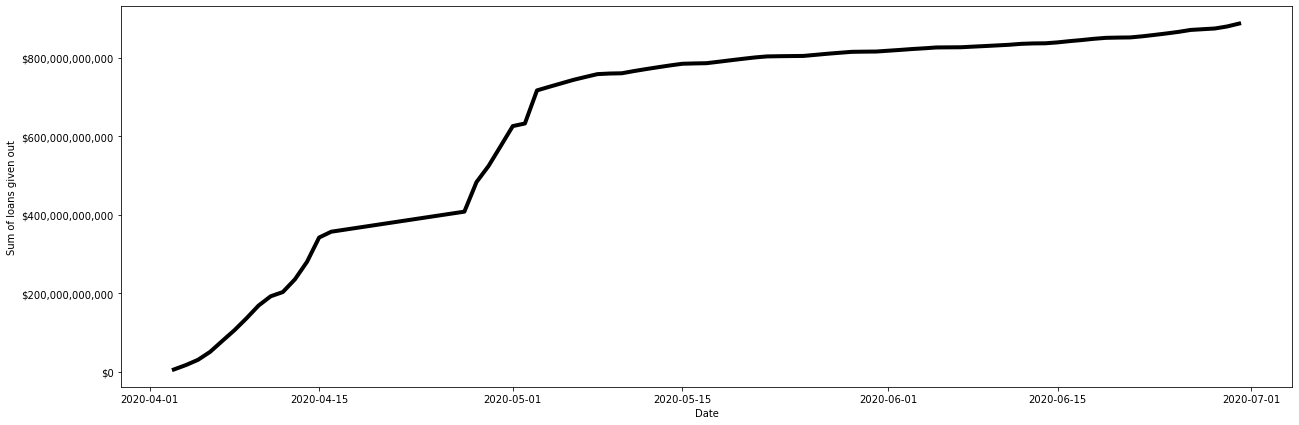

In [21]:
fig, ax = plt.subplots(figsize=(21, 7))

x = final.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = final.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values

ax.plot(x, yy, linewidth=4, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Sum of loans given out"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [22]:
final

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,LoanAmount,loan_lower,loan_upper,date_approved_dt
0,a $5-10 million,-,-,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,1,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00,NaN,5000000,10000000,2020-04-14
1,a $5-10 million,-,-,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,2,215.0,04/15/2020,First National Bank Alaska,AK - 00,NaN,5000000,10000000,2020-04-15
2,a $5-10 million,-,-,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,2,367.0,04/11/2020,KeyBank National Association,AK - 00,NaN,5000000,10000000,2020-04-11
3,a $5-10 million,-,-,ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,2,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00,NaN,5000000,10000000,2020-04-29
4,a $5-10 million,-,-,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,2,267.0,06/10/2020,CoBank ACB,AK - 00,NaN,5000000,10000000,2020-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224165,"e $150,000-350,000",-,-,ROCKWELL CITY,IA,50579.0,454390.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,2,1.0,05/02/2020,United Bank of Iowa,IA - 04,100.0,150000,349999,2020-05-02
4224166,"e $150,000-350,000",-,-,COLESBURG,IA,52035.0,238110.0,Independent Contractors,Unanswered,Unanswered,Unanswered,2,1.0,04/28/2020,Farmers Savings Bank,IA - 01,87.0,150000,349999,2020-04-28
4224167,"e $150,000-350,000",-,-,URBANDALE,IA,50322.0,713940.0,Self-Employed Individuals,Unanswered,Male Owned,Unanswered,2,NaN,04/27/2020,Bankers Trust Company,IA - 03,47.0,150000,349999,2020-04-27
4224168,"e $150,000-350,000",-,-,NORWALK,IA,50211.0,423830.0,Corporation,Unanswered,Unanswered,Unanswered,2,2.0,05/03/2020,"Bank of America, National Association",IA - 03,22.0,150000,349999,2020-05-03


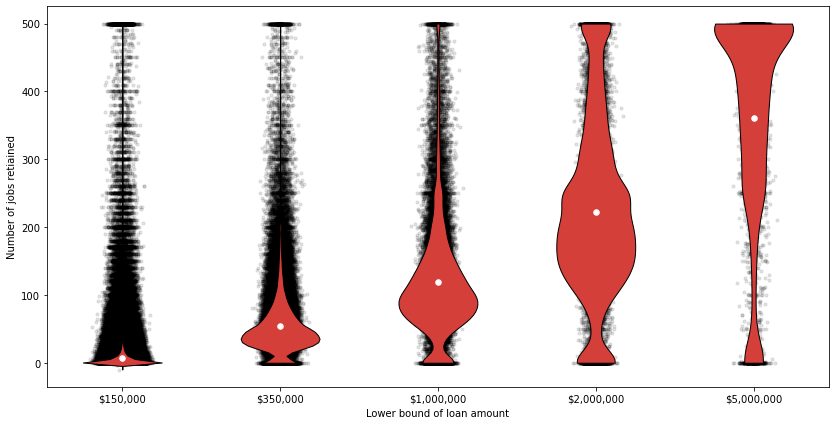

In [23]:
fig, ax = plt.subplots(figsize=(14,7))

alpha=0.1
lower = final.loan_lower.unique()[::-1]

labels = [f"${n:,.0f}" for n in lower]
lidx = np.arange(len(labels)) + 1


x = []
for l in lower:
  x.append(final.query(f"loan_lower == {l}")[final.query(f"loan_lower == {l}")["JobsRetained"].notna()]["JobsRetained"].values)

parts = ax.violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

    
mean = [np.mean(i) for i in x]
ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)

######## Add some random "jitter" to the x-axis
xx = [lval + np.random.normal(1, 0.04, size=len(d))-1 for d, lval in zip(x, lidx)]

for vals, xvals in zip(xx, x):
  ax.scatter(vals, xvals, alpha=alpha, s=10, zorder=-1, color="k")

ax.set_xticks(lidx)
ax.set_xticklabels(labels)
ax.set_xlabel("Lower bound of loan amount")
ax.set_ylabel("Number of jobs retiained")


plt.show()

In [24]:
final.iloc[np.where(final.JobsRetained.values == 0.0)[0]]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,LoanAmount,loan_lower,loan_upper,date_approved_dt
3,a $5-10 million,-,-,ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,2,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00,NaN,5000000,10000000,2020-04-29
9,a $5-10 million,-,-,ANCHORAGE,AK,99501.0,611420.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,2,0.0,04/30/2020,BBVA USA,AK - 00,NaN,5000000,10000000,2020-04-30
10,a $5-10 million,-,-,ANCHORAGE,AK,99501.0,488190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,2,0.0,04/30/2020,BBVA USA,AK - 00,NaN,5000000,10000000,2020-04-30
21,b $2-5 million,-,-,ANCHORAGE,AK,99503.0,221122.0,Corporation,Unanswered,Unanswered,Unanswered,2,0.0,05/06/2020,"Wells Fargo Bank, National Association",AK - 00,NaN,2000000,4999999,2020-05-06
66,b $2-5 million,-,-,ANCHORAGE,AK,99501.0,551112.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,2,0.0,04/30/2020,BBVA USA,AK - 00,NaN,2000000,4999999,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224075,"e $150,000-350,000",-,-,WEST DES MOINES,IA,50266.0,812112.0,Corporation,Unanswered,Unanswered,Unanswered,2,0.0,05/08/2020,"Wells Fargo Bank, National Association",IA - 03,463.0,150000,349999,2020-05-08
4224096,"e $150,000-350,000",-,-,HAVELOCK,IA,50546.0,111150.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,2,0.0,05/26/2020,"Farm Credit Services of America, ACA",IA - 04,400.0,150000,349999,2020-05-26
4224126,"e $150,000-350,000",-,-,KNOXVILLE,IA,50138.0,524298.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,2,0.0,06/24/2020,"Wells Fargo Bank, National Association",IA - 02,313.0,150000,349999,2020-06-24
4224153,"e $150,000-350,000",-,-,DAYTON,IA,50530.0,811198.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,2,0.0,05/22/2020,Security Savings Bank,IA - 04,200.0,150000,349999,2020-05-22


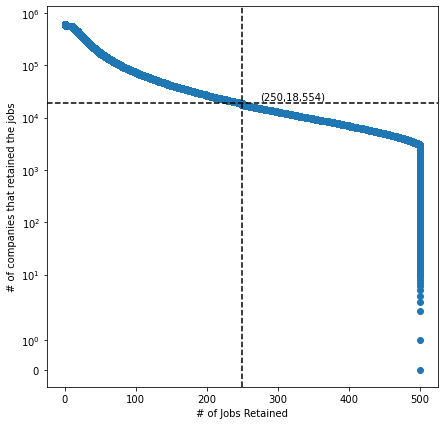

In [25]:
fig, ax = plt.subplots(figsize=(7,7))

m = df.JobsRetained.isna()
njobs = 250
xeps=0.1
yeps=0.2

x = np.sort(df.JobsRetained.values[~m])[::-1]
y = np.arange(len(x))

xl = njobs
yl = y[np.where(x<njobs)[0][0]]

ax.axvline(x=xl, color="k", linestyle="--")
ax.axhline(y=yl, color="k", linestyle="--")

ax.annotate(f"({xl:,.0f},{yl:,.0f})", (xl*(1+xeps), yl*(1+yeps)))

ax.scatter(x, y)


kwd = {"yscale": "symlog",
       "xlabel" : "# of Jobs Retained",
       "ylabel" : "# of companies that retained the jobs"}
ax.set(**kwd)

plt.show()

In [26]:
group_a = df[df['LoanRange'] == 'a $5-10 million']
# group_a.describe(include='all')
highest_groupa_lenders = group_a['Lender'].value_counts().to_frame()
highest_groupa_lenders.columns = ['No of $5m+ loans']
top_5mplus = pd.DataFrame({"Lender's Name": [i for i in highest_groupa_lenders.index],
                          "No of Loans": [i for i in highest_groupa_lenders['No of $5m+ loans']]})
top_5mplus.head(15)

,Lender's Name,No of Loans
0,"JPMorgan Chase Bank, National Association",276
1,"Bank of America, National Association",226
2,"PNC Bank, National Association",201
3,KeyBank National Association,141
4,Truist Bank d/b/a Branch Banking & Trust Co,137
5,BMO Harris Bank National Association,129
6,The Huntington National Bank,101
7,"Zions Bank, A Division of",98
8,Manufacturers and Traders Trust Company,92
9,Fifth Third Bank,85


In [27]:

lenders = final['Lender'].value_counts().to_frame()
lenders.columns = ['No of Loans']

df_lenders = pd.DataFrame({"Lender's Name": [i for i in lenders.index],
                         "No of Loans": [i for i in lenders['No of Loans']]})

# Getting number of lenders and loans.
num_of_lenders = len(final['Lender'].unique())
num_of_loans = final['Lender'].value_counts().sum()

# Presenting number of lenders and loans.
print(f"{num_of_lenders} lenders processed {num_of_loans} loans.")

print()
print('Top 5 lenders')
df_lenders.head()

4895 lenders processed 4885388 loans.

Top 5 lenders


,Lender's Name,No of Loans
0,"Bank of America, National Association",334761
1,"JPMorgan Chase Bank, National Association",269424
2,"Wells Fargo Bank, National Association",185598
3,Celtic Bank Corporation,148606
4,Cross River Bank,134472


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


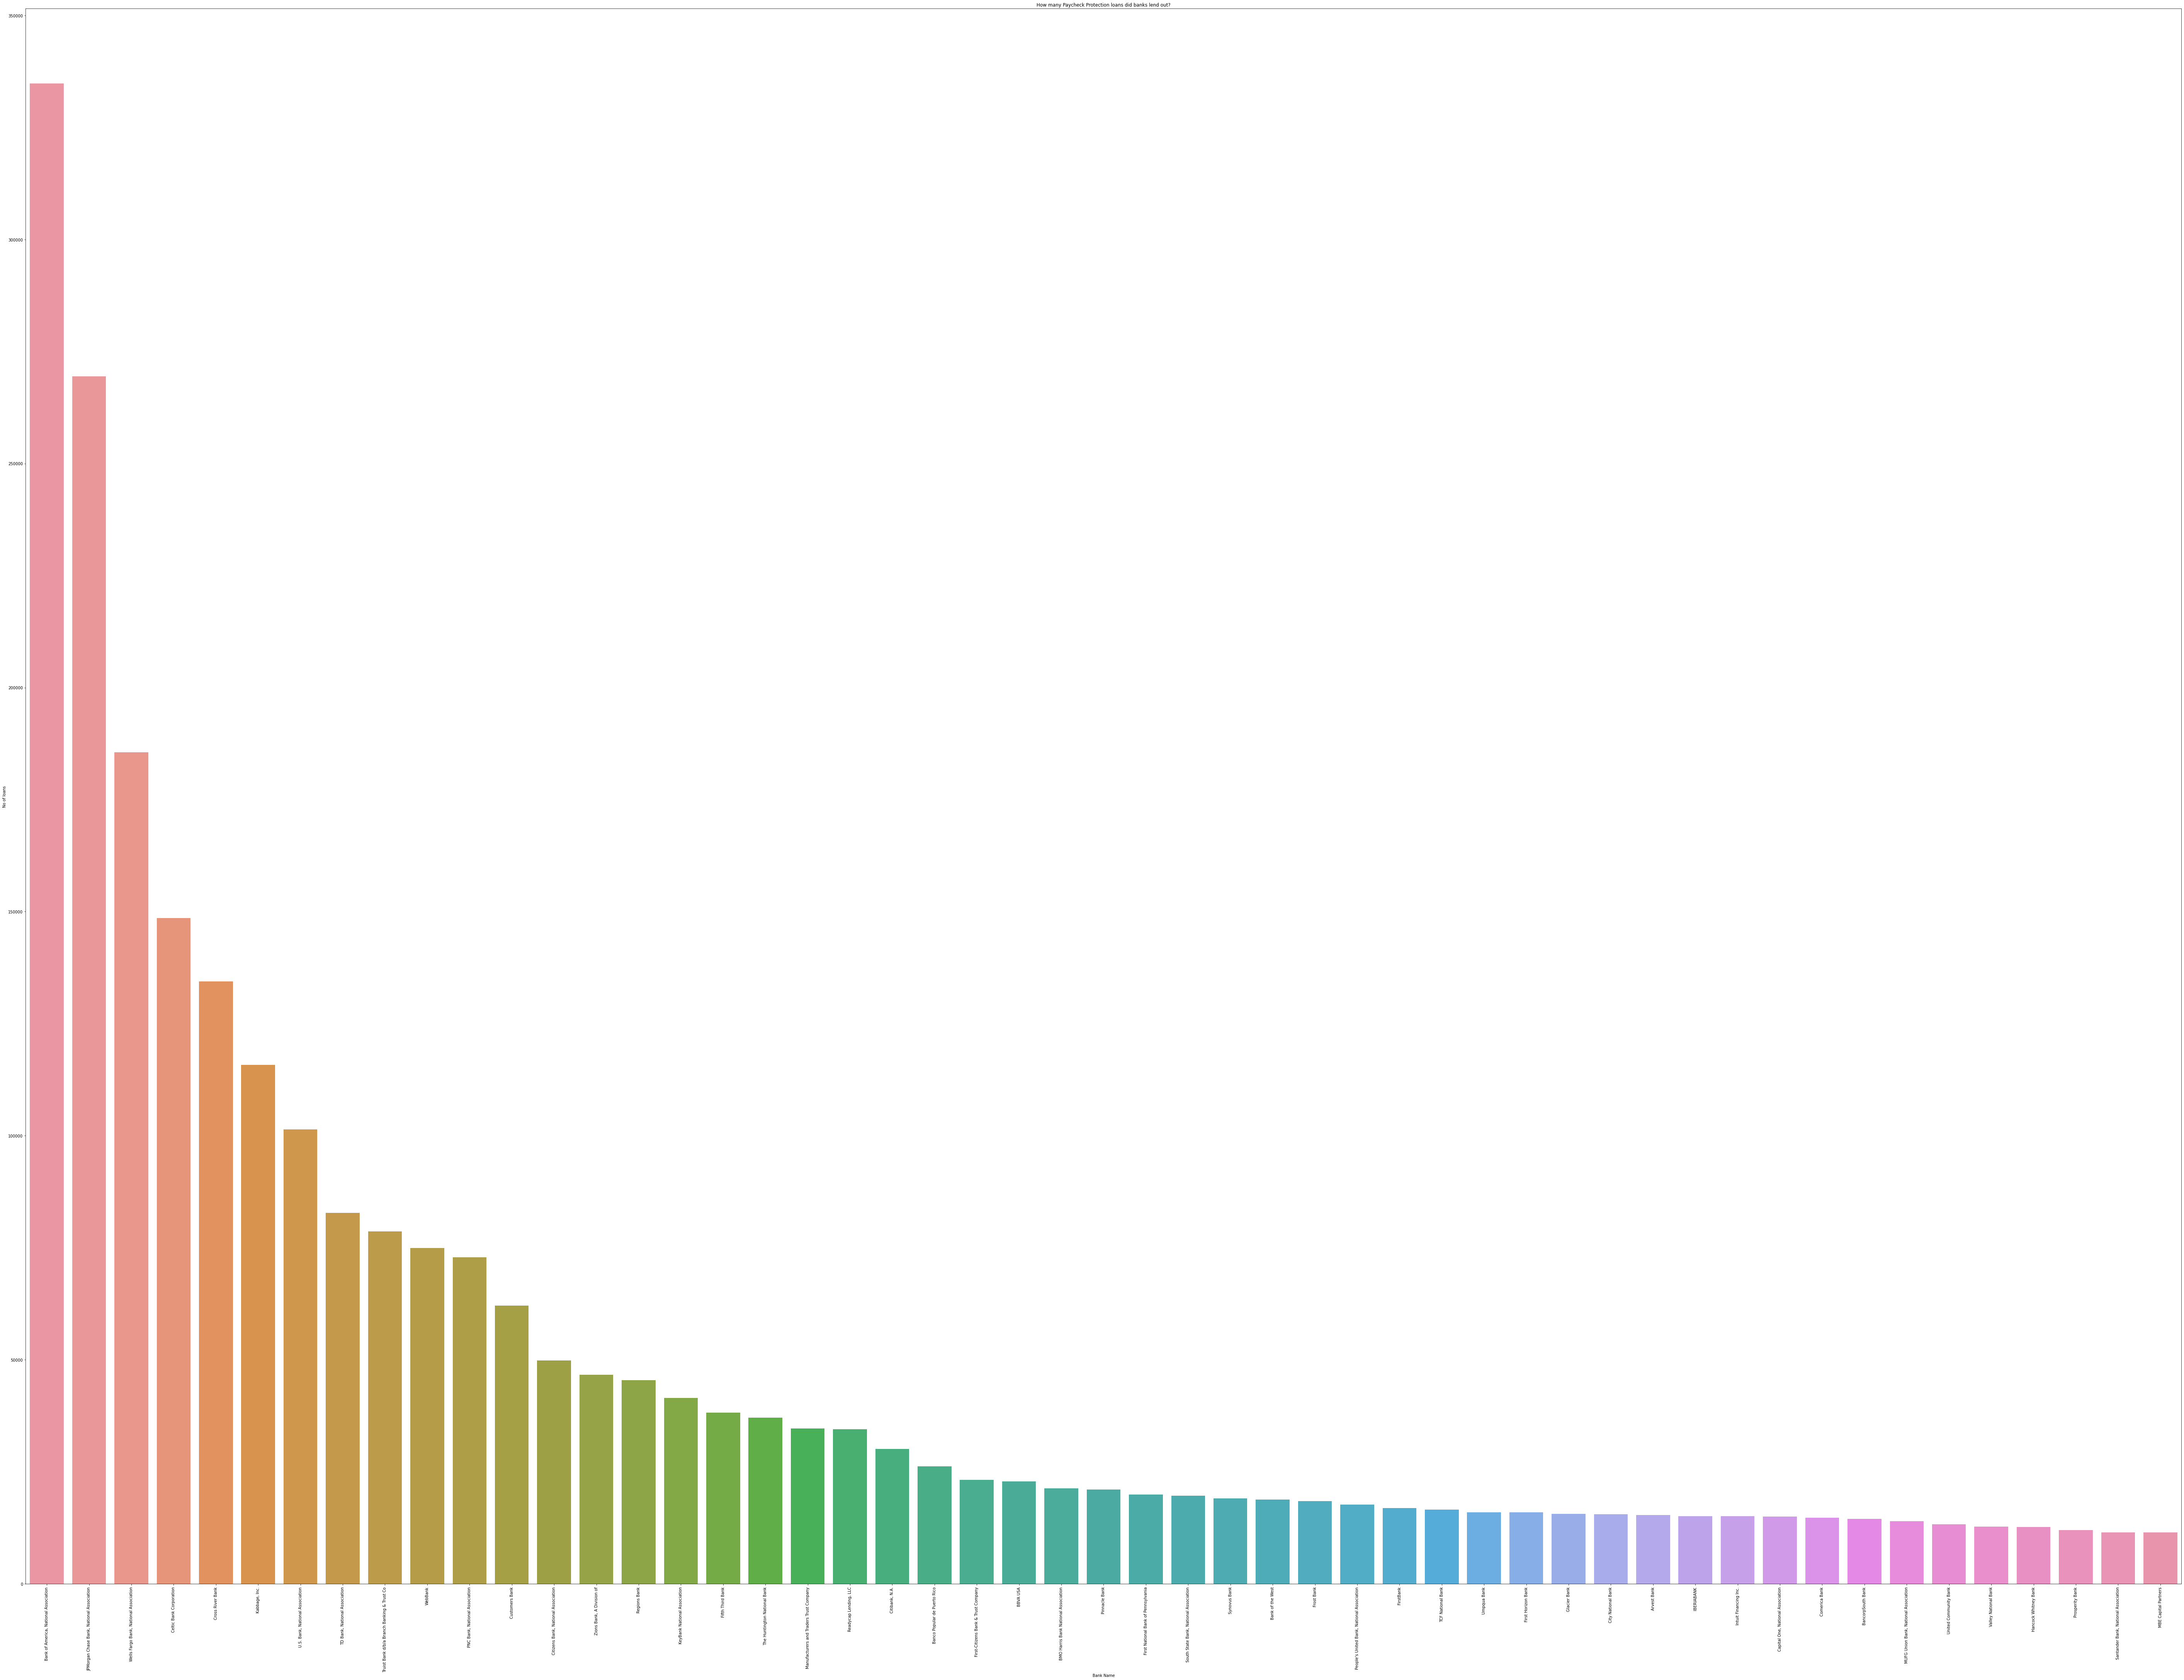

In [28]:
plt.figure(figsize=(100,75))
sns.barplot("Lender's Name", 'No of Loans', data=df_lenders[:51])
plt.xticks(rotation=90)
plt.title('How many Paycheck Protection loans did banks lend out?')
plt.xlabel('Bank Name')
plt.ylabel('No of loans')
plt.show()


In [29]:
group_a = df[df['LoanRange'] == 'a $5-10 million']
# group_a.describe(include='all')
highest_groupa_lenders = group_a['Lender'].value_counts().to_frame()
highest_groupa_lenders.columns = ['No of $5m+ loans']
top_5mplus = pd.DataFrame({"Lender's Name": [i for i in highest_groupa_lenders.index],
                          "No of Loans": [i for i in highest_groupa_lenders['No of $5m+ loans']]})
top_5mplus.head(15)

,Lender's Name,No of Loans
0,"JPMorgan Chase Bank, National Association",276
1,"Bank of America, National Association",226
2,"PNC Bank, National Association",201
3,KeyBank National Association,141
4,Truist Bank d/b/a Branch Banking & Trust Co,137
5,BMO Harris Bank National Association,129
6,The Huntington National Bank,101
7,"Zions Bank, A Division of",98
8,Manufacturers and Traders Trust Company,92
9,Fifth Third Bank,85


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


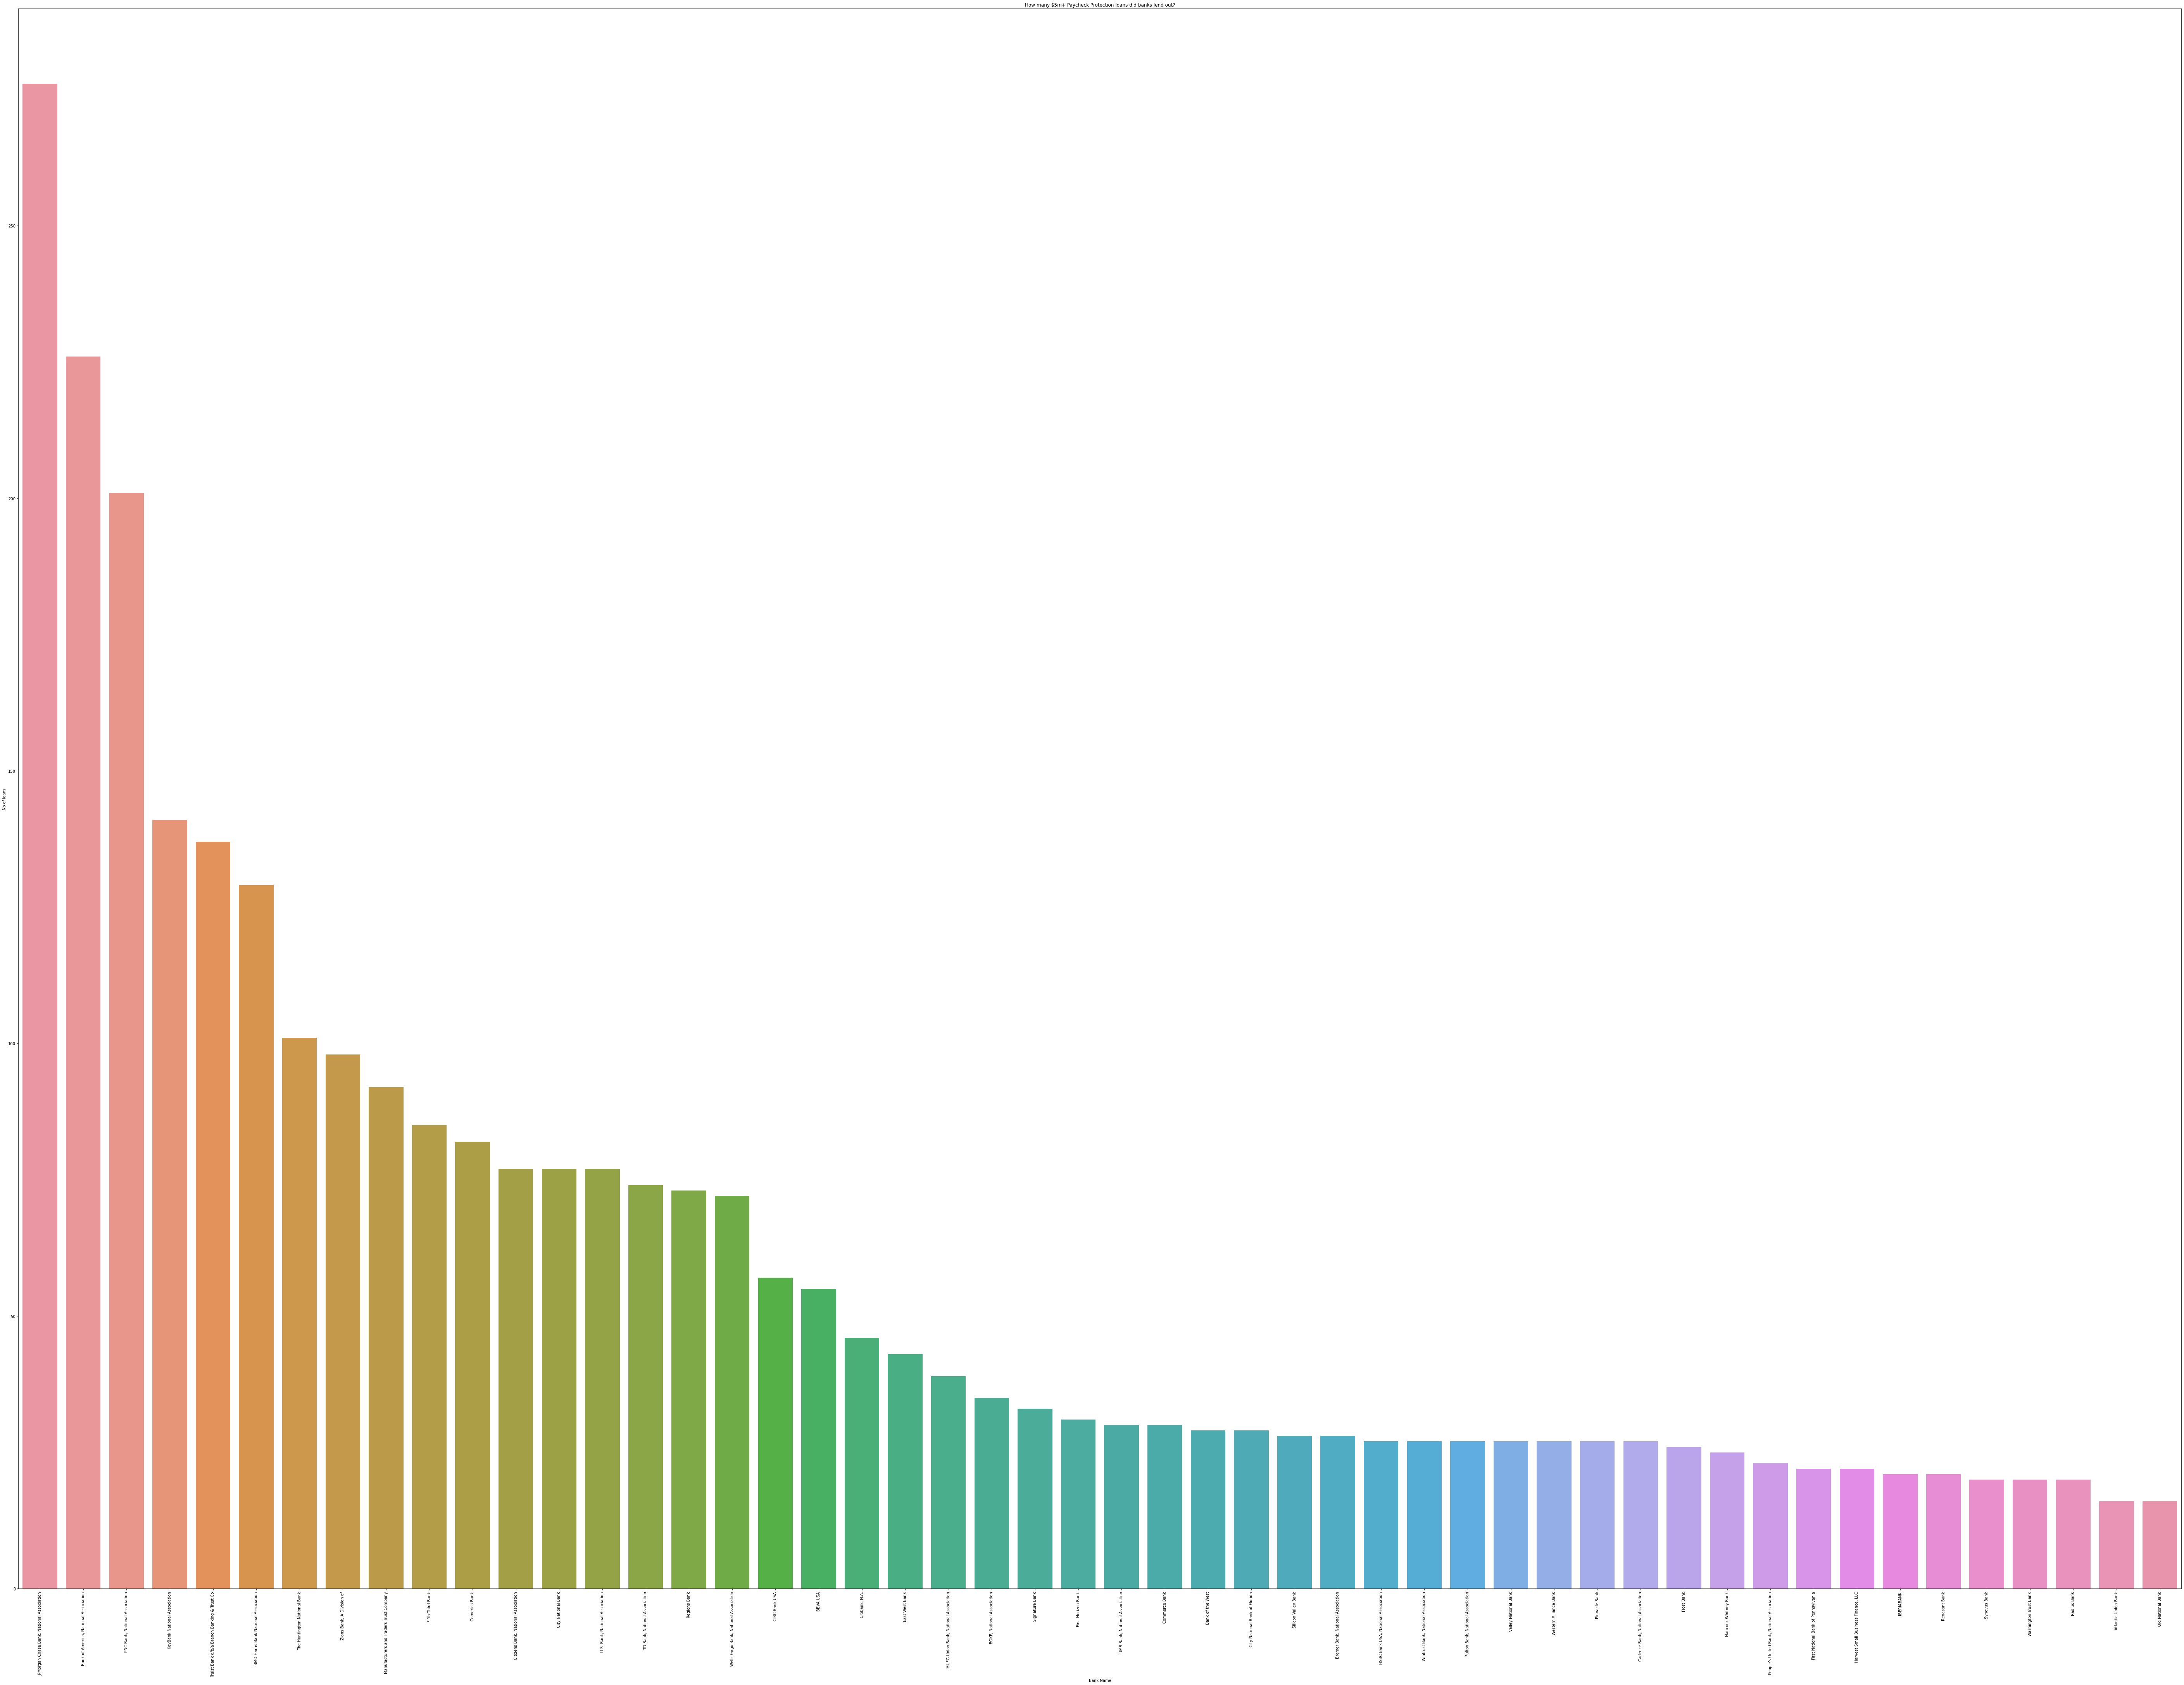

In [30]:
plt.figure(figsize=(100,75))
sns.barplot("Lender's Name", 'No of Loans', data=top_5mplus[:50])
plt.xticks(rotation=90)
plt.title('How many $5m+ Paycheck Protection loans did banks lend out?')
plt.xlabel('Bank Name')
plt.ylabel('No of loans')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


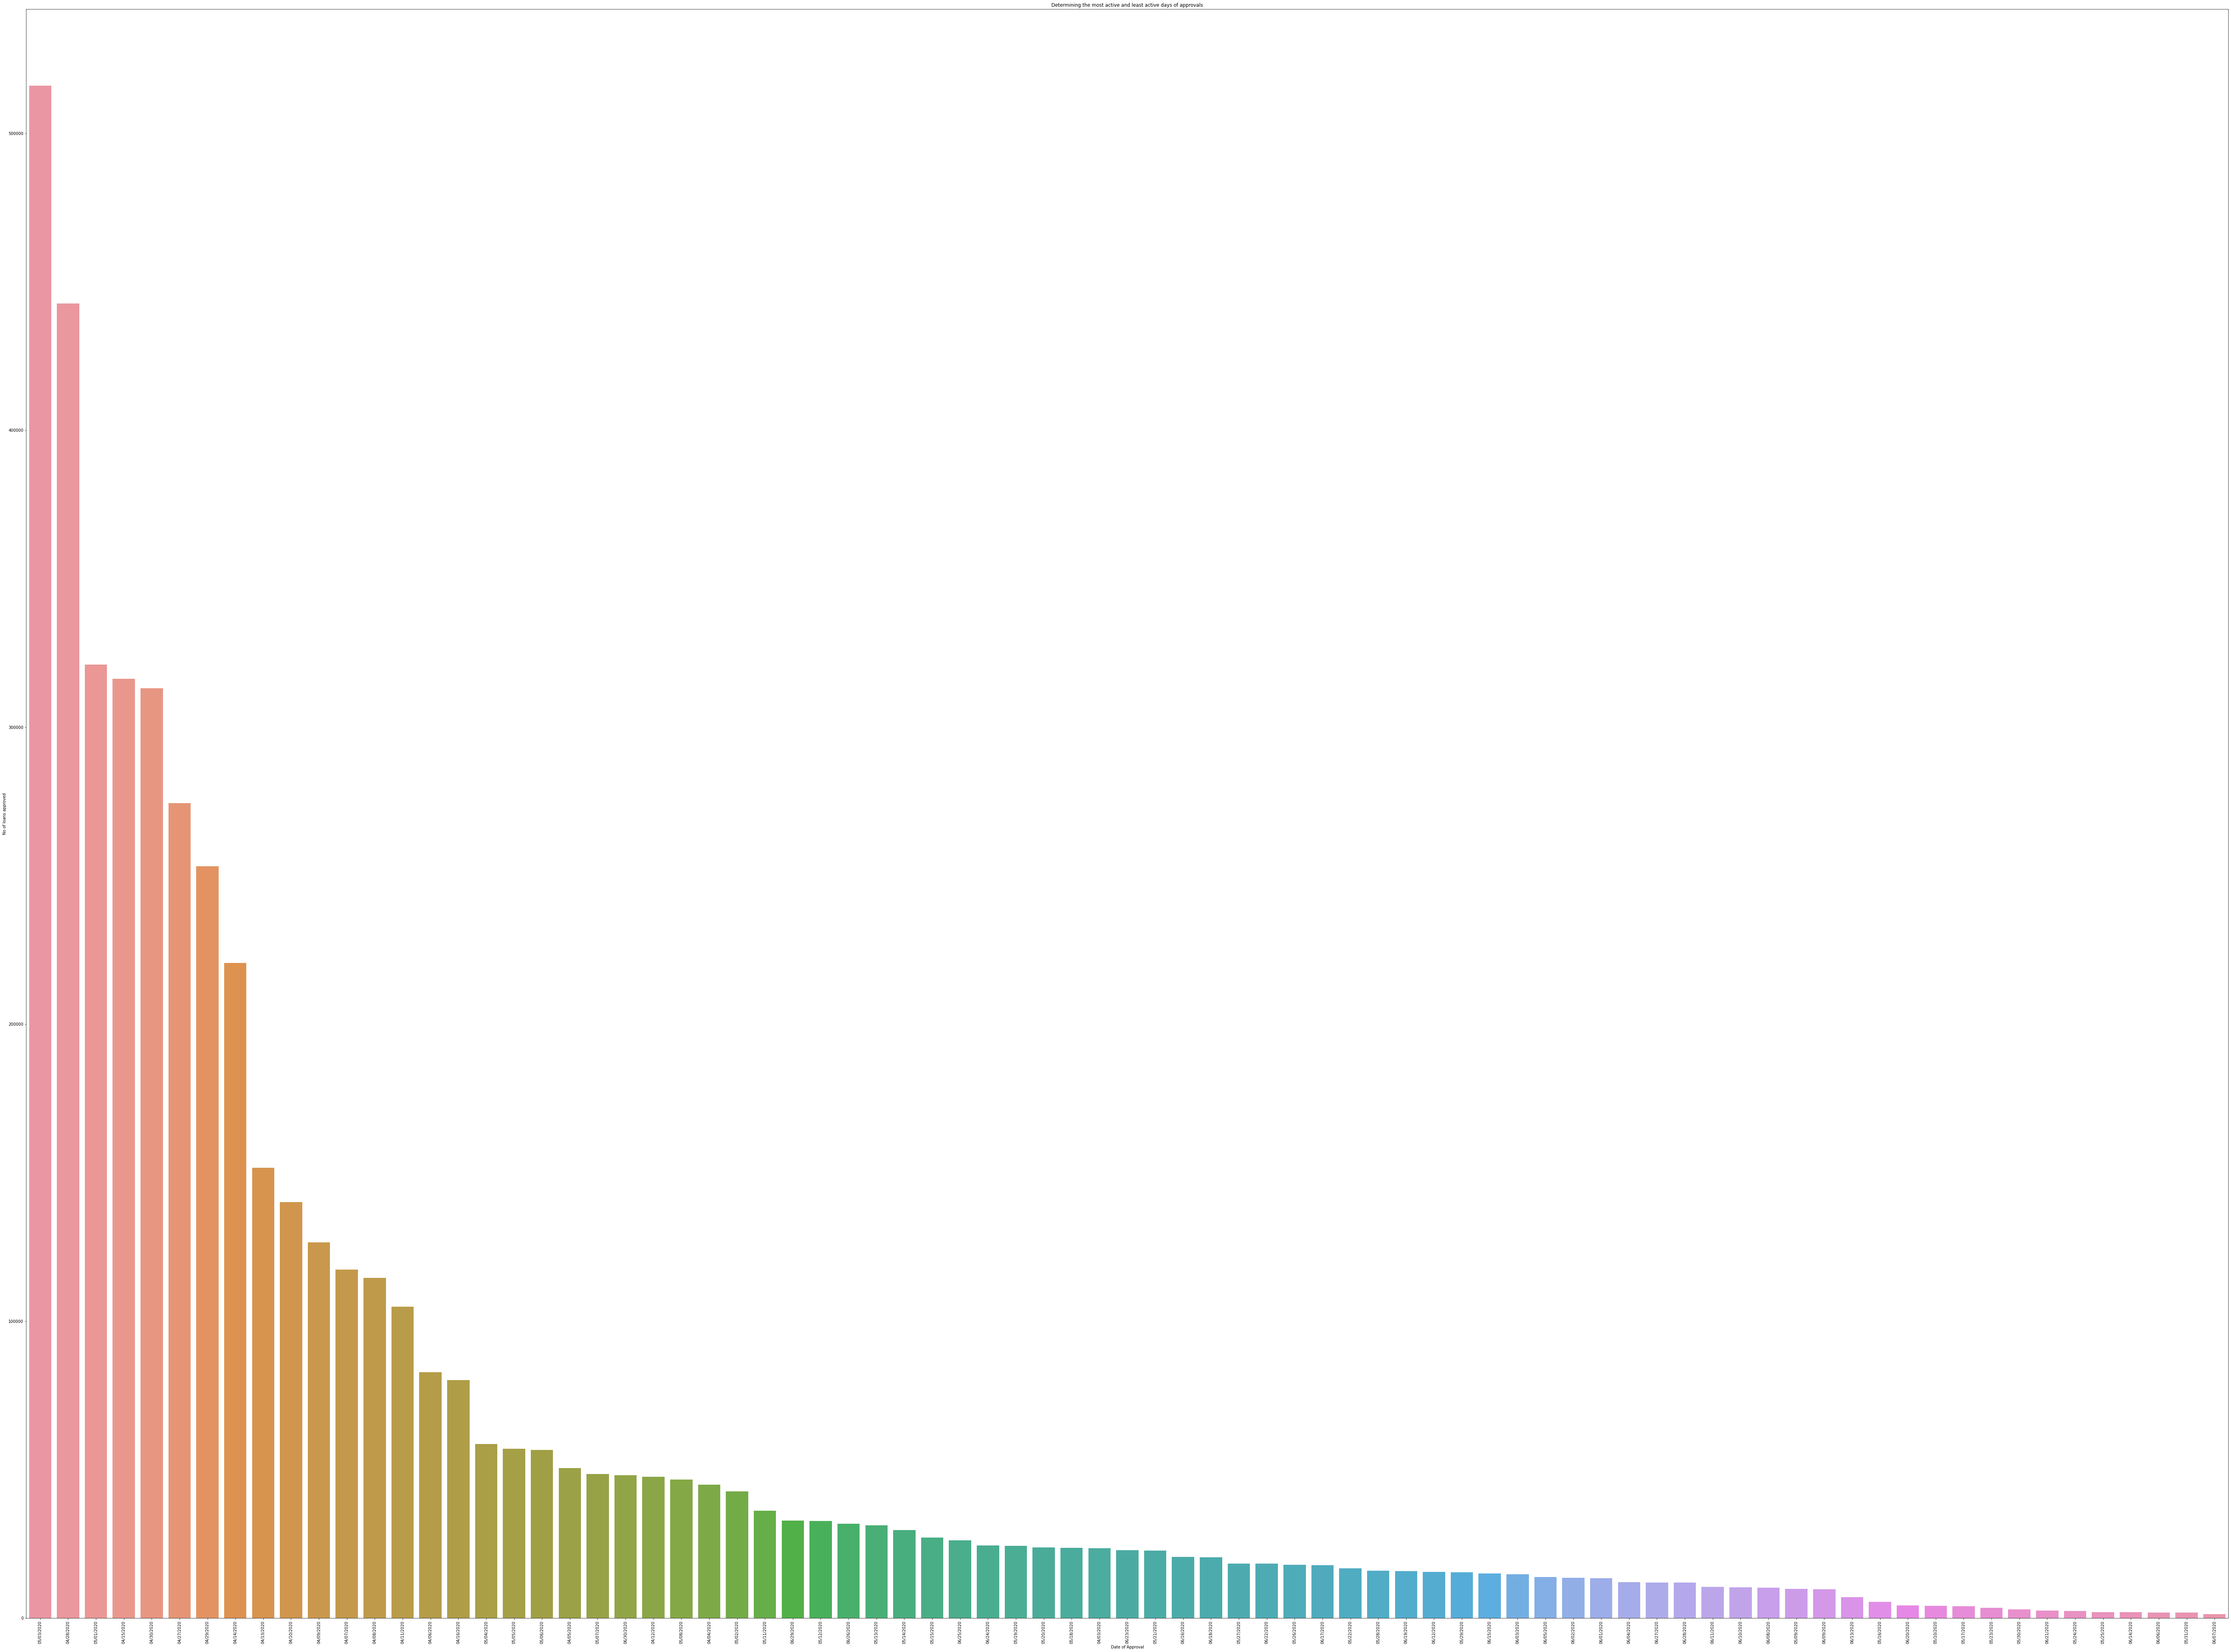

In [31]:
approvals_general = pd.DataFrame({'Date of Approval': final['DateApproved'].value_counts().index.to_list(),
                                  'No of Approvals': final['DateApproved'].value_counts().to_list()})
plt.figure(figsize=(100,75))
plt.xticks(rotation=90)
sns.barplot(approvals_general['Date of Approval'], approvals_general['No of Approvals'])
plt.title('Determining the most active and least active days of approvals')
plt.ylabel('No of loans approved')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


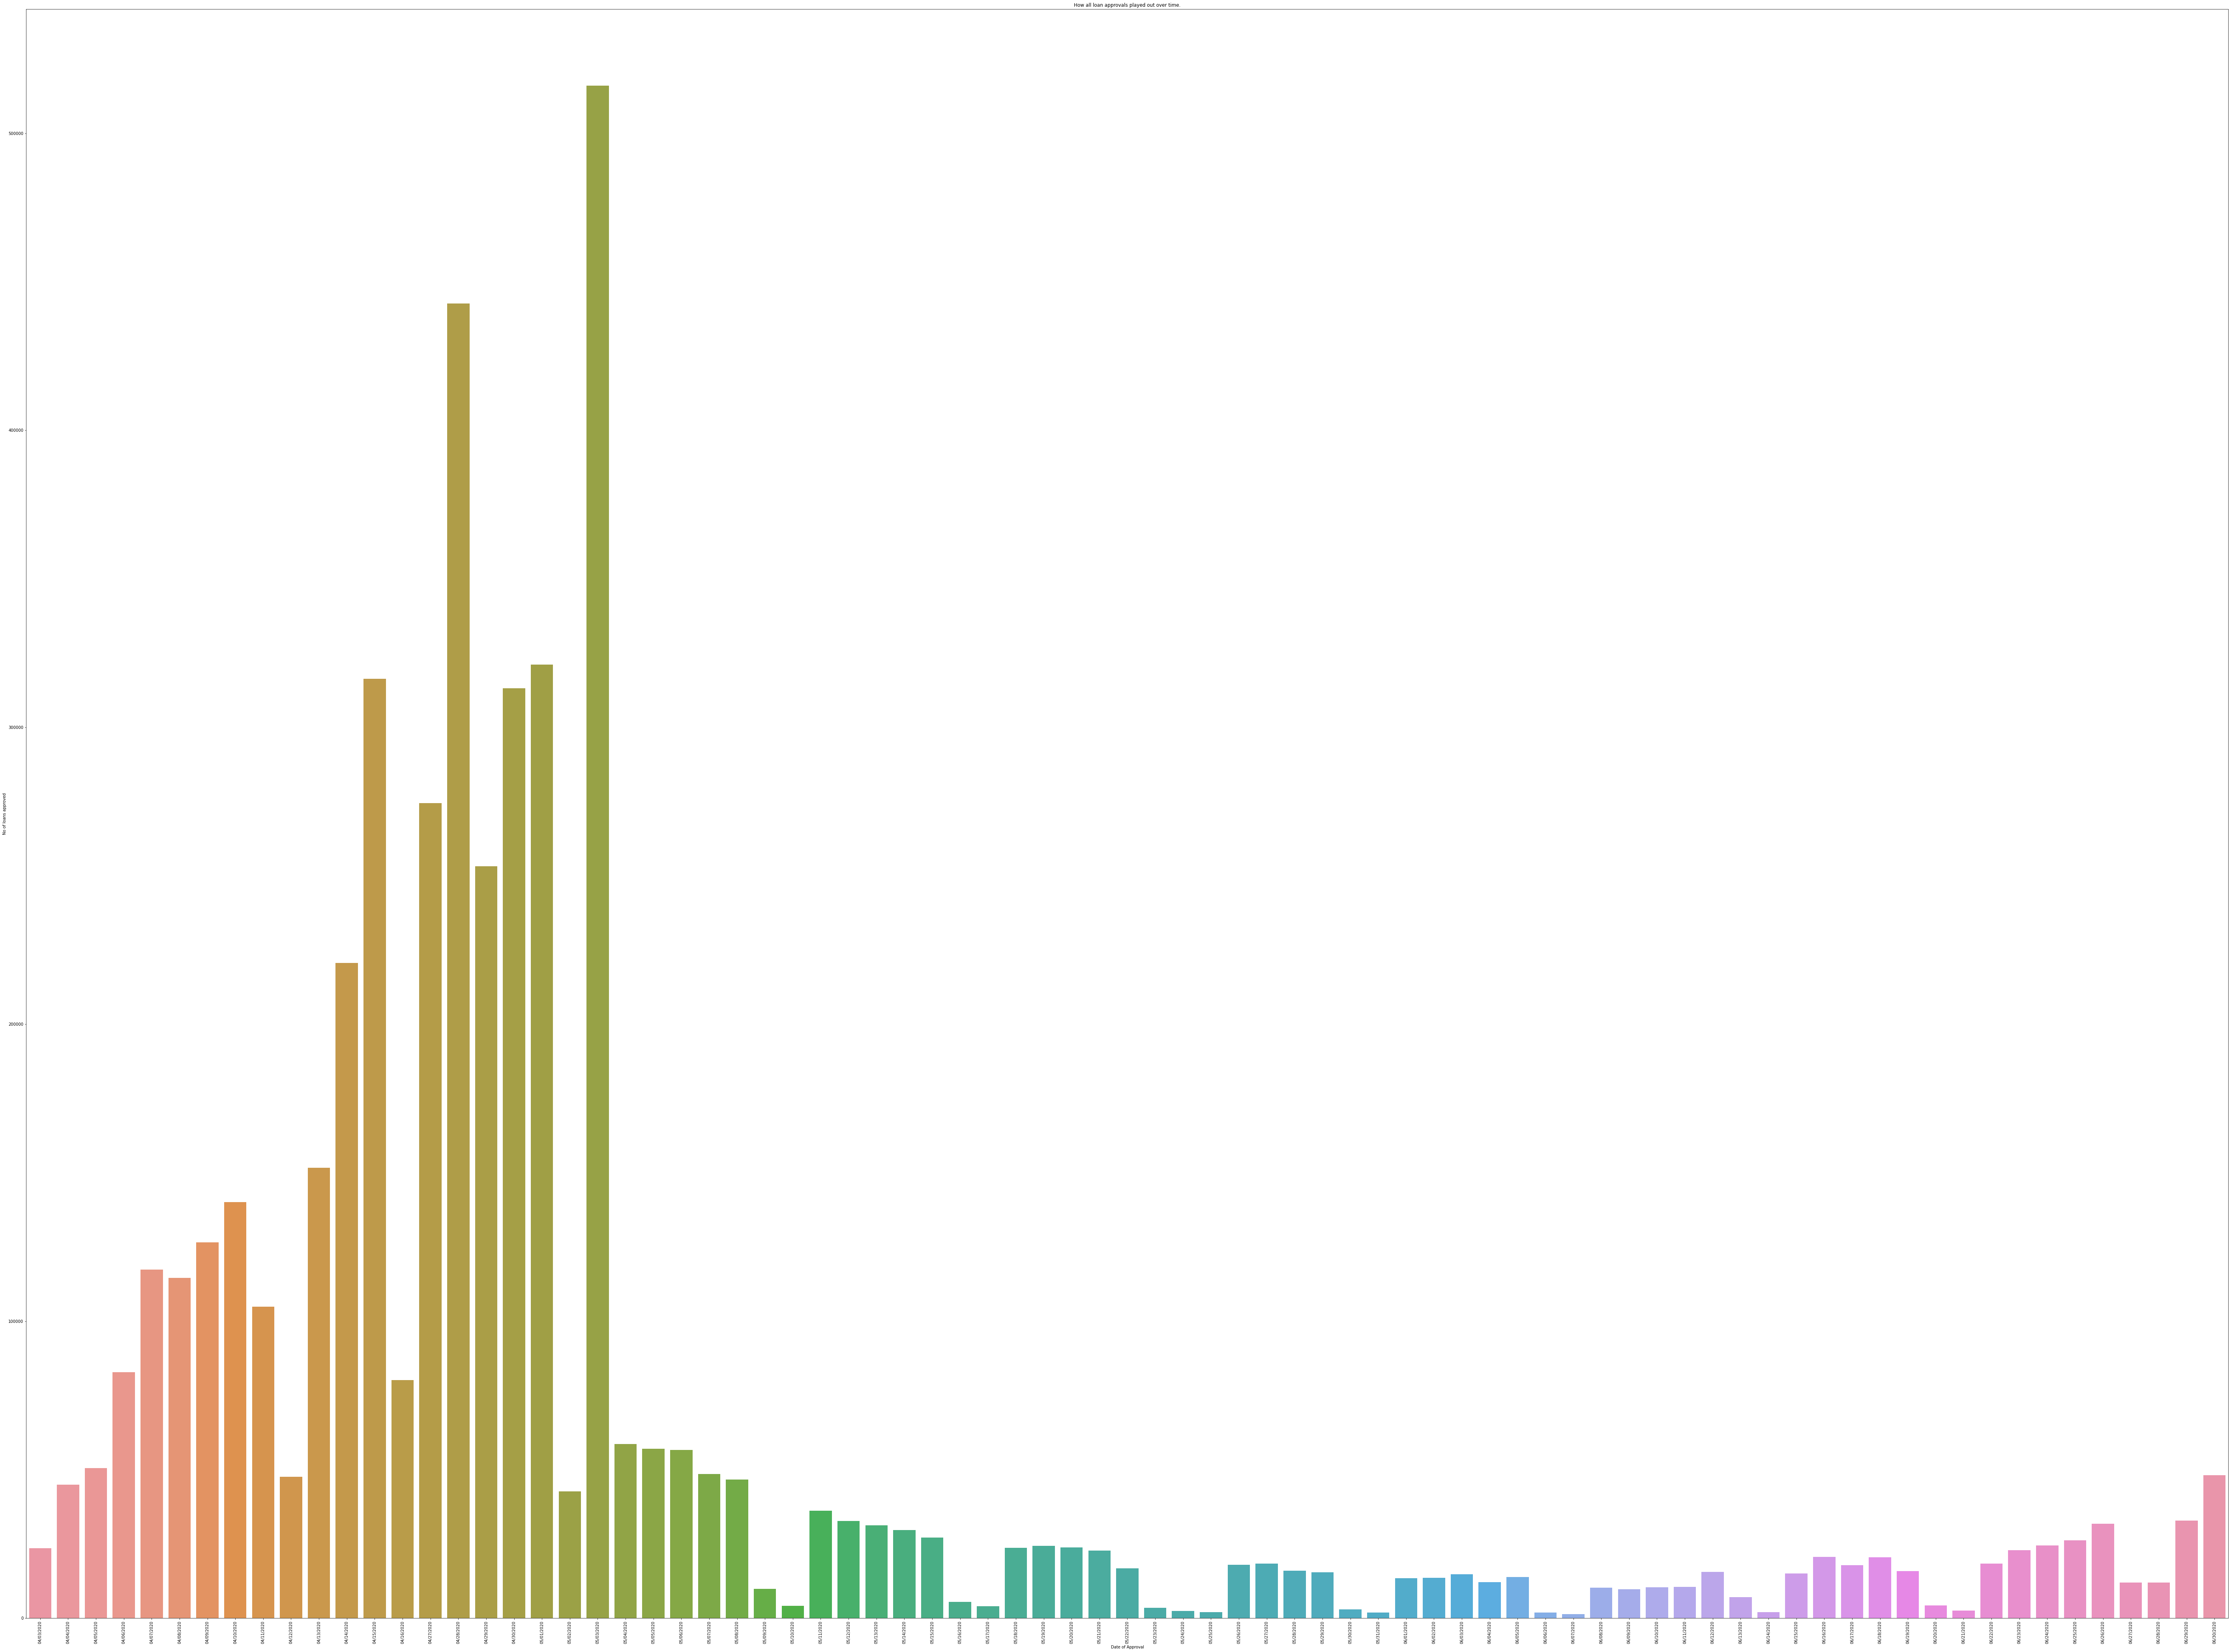

In [32]:
approvals_general.sort_values(by='Date of Approval', inplace=True)
plt.figure(figsize=(100,75))
plt.xticks(rotation=90)
sns.barplot(approvals_general['Date of Approval'], approvals_general['No of Approvals'])
plt.title('How all loan approvals played out over time.')
plt.ylabel('No of loans approved')
plt.show()

In [33]:
frame_after_412 = approvals_general['Date of Approval'] > '04/12/2020'
frame_before_503 = approvals_general['Date of Approval'] < '05/03/2021'

approvals_peak_periods = approvals_general[(frame_after_412) & (frame_before_503)]['No of Approvals'].sum()

total_applications = approvals_general['No of Approvals'].sum()

percent_applications_peakperiods = (approvals_peak_periods / total_applications) * 100

print(f"Overall, {percent_applications_peakperiods:.2f}% of all businesses applied during the peak periods i.e between April 13 and May 3rd.")

Overall, 60.01% of all businesses applied during the peak periods i.e between April 13 and May 3rd.


In [34]:
e = final.copy()
e['LoanRange'] = 'f $1 - 150,000'

In [36]:
doa_dict = {} 
category_list = ['a $5-10 million', 'b $2-5 million', 'c $1-2 million', 'd $350,000-1 million', 'e $150,000-350,000', 'f $1 - 150,000']
for i in category_list:
    if i[0] in 'abcde':
        doa_dict[i] = final[final['LoanRange'] == i]
    elif i[0] == 'f':
        doa_dict[i] = e[e['LoanRange'] == i]

# Accounting for number of loans approved on the most active and least active days of approval.
approved_415 = 0
approved_607 = 0

for i in doa_dict.keys():
    in_sight_dates = doa_dict[i][['DateApproved','Lender']]
    in_sight_415_banks = in_sight_dates[in_sight_dates['DateApproved'] == '05/03/2020']
    approved_415 += in_sight_415_banks['DateApproved'].count()
    
    in_sight_607_banks = in_sight_dates[in_sight_dates['DateApproved'] == '06/07/2021']
    approved_607 += in_sight_607_banks['DateApproved'].count()
    
print(f"Overall, {approved_415:,} loans were approved on the peak day for approvals     - 04/15/2020")
print(f"Overall, {approved_607:,} loans were approved on the least active day for approvals   - 06/07/2021")

Overall, 1,032,088 loans were approved on the peak day for approvals     - 04/15/2020
Overall, 0 loans were approved on the least active day for approvals   - 06/07/2021
